In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
df = pd.read_csv('train_FD001_selected_features.csv')
df_test = pd.read_csv('processed_test_data_FD001.csv')

In [6]:
df

,time,sen_measurement2,sen_measurement3,sen_measurement4,sen_measurement7,sen_measurement8,sen_measurement11,sen_measurement12,sen_measurement13,sen_measurement15,sen_measurement17,sen_measurement20,sen_measurement21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,196,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,197,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,198,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,199,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


In [7]:
df_test

,time,sen_measurement2,sen_measurement3,sen_measurement4,sen_measurement7,sen_measurement8,sen_measurement11,sen_measurement12,sen_measurement13,sen_measurement15,sen_measurement17,sen_measurement20,sen_measurement21,RUL
0,1,643.02,1585.29,1398.21,553.90,2388.04,47.20,521.72,2388.03,8.4052,392,38.86,23.3735,142
1,2,641.71,1588.45,1395.42,554.85,2388.01,47.50,522.16,2388.06,8.3803,393,39.02,23.3916,141
2,3,642.46,1586.94,1401.34,554.11,2388.05,47.50,521.97,2388.03,8.4441,393,39.08,23.4166,140
3,4,642.44,1584.12,1406.42,554.07,2388.03,47.28,521.38,2388.05,8.3917,391,39.00,23.3737,139
4,5,642.51,1587.19,1401.92,554.16,2388.01,47.31,522.15,2388.03,8.4031,390,38.99,23.4130,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,194,643.24,1599.45,1415.79,553.41,2388.02,47.69,520.69,2388.00,8.4715,394,38.65,23.1974,24
13092,195,643.22,1595.69,1422.05,553.22,2388.05,47.60,521.05,2388.09,8.4512,395,38.57,23.2771,23
13093,196,643.44,1593.15,1406.82,553.04,2388.11,47.57,521.18,2388.04,8.4569,395,38.62,23.2051,22
13094,197,643.26,1594.99,1419.36,553.37,2388.07,47.61,521.33,2388.08,8.4711,395,38.66,23.2699,21


In [8]:
X = df.iloc[:, 0:-1]
Y = df.iloc[:, -1]

In [9]:
regressor = RandomForestRegressor()
regressor.fit(X,Y)

RandomForestRegressor()

In [10]:
import joblib
joblib.dump(regressor, filename='RUL_Prediction_model_ML.pkl')

['RUL_Prediction_model_ML.pkl']

In [29]:
X_test = df_test.iloc[:, 0:-1]
Y_test = df_test.iloc[:, -1]

In [33]:
Y_pred = regressor.predict(X_test)

print('MSE on Test set:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

y_pred_train = regressor.predict(X)
print('MSE on Training set:', np.sqrt(metrics.mean_squared_error(Y, y_pred_train)))

MSE on Test set: 42.25517865176393
MSE on Training set: 14.093507975462767


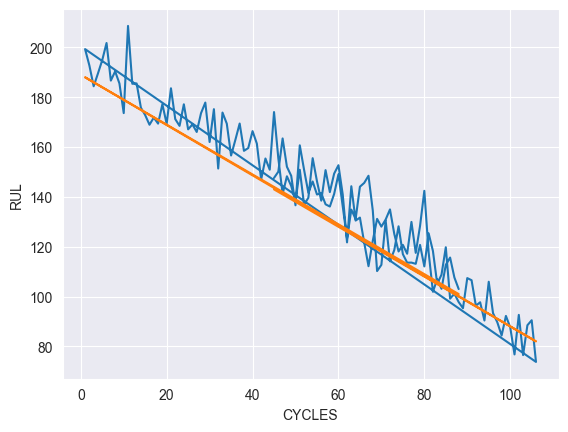

In [13]:
a,b=250,400
rang = list(range(a,b))
plt.plot(np.array(X_test)[rang,0],Y_pred[rang])
plt.plot(np.array(X_test)[rang,0],np.array(Y_test)[rang])

plt.ylabel('RUL')
plt.xlabel('CYCLES')
plt.show()

In [26]:
param_grid = {'max_features': ['auto','sqrt','log2'], 'n_estimators': [350,400, 600, 800, 1000, 1200, 1400], 'max_depth': [2,3,4,5], 'min_samples_leaf':[2,3,4,5,6,7,8]}
RF = GridSearchCV(RandomForestRegressor(), param_grid = param_grid,scoring = "neg_mean_squared_error",
                     n_jobs = -1, cv = 10)
RF.fit(X,Y)
print(RF.best_params_)

C:\Users\DeTa5\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1960 fits failed out of a total of 5880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
717 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DeTa5\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DeTa5\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\DeTa5\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints

{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'n_estimators': 350}


In [27]:
tuned_model = RandomForestRegressor(max_depth= 5, max_features='log2', min_samples_leaf=4, n_estimators=350)
tuned_model.fit(X, Y)

RandomForestRegressor(max_depth=5, max_features='log2', min_samples_leaf=4,
                      n_estimators=350)

In [28]:
y_pred = tuned_model.predict(X_test)
print('RMSE on Test set:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

y_pred_train = tuned_model.predict(X)
print('RMSE on Training set:', np.sqrt(metrics.mean_squared_error(Y, y_pred_train)))

RMSE on Test set: 42.25517865176393
RMSE on Training set: 38.167138425400616
